<a href="https://colab.research.google.com/github/rameshmech/ML_hands_on_sessions/blob/master/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modules we'll use
import pandas as pd
import numpy as np

# read in all our data
train_bsl = pd.read_csv("train_baseline.csv")
train_labs = pd.read_csv('train_labs.csv',thousands=',')
#Read the entire dataset -- Training Vitals
train_vitals = pd.read_csv('train_vitals.csv',thousands=',')

# set seed for reproducibility
np.random.seed(0) 

In [7]:
# look at a few rows of the data file. I can see a handful of missing data already!
train_bsl.sample(5)

,PatientID,Study,Race,Age,Country,Indication,Sex,Ethnicity,Treatment,BaselineECOG,...,DiseaseStage,EGFR,Histology,KRAS,PriorChemo,SmokeHx,Status,TreatmentStartDate,ObservationStartDate,Respond
1540,RAADCT01922,11ff0321a67fef522bef3f970c492399337d4e97,ASIAN,62,Other,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Chemo,0.0,...,IVB,NaN,SQUAMOUS,NaN,Y,Previous,METASTATIC,2014-09-17T14:10:00Z,2014-09-16,0
2752,RAADCT04468,9d6b9b28c35b1d16fb573ce42b56f40aff45355b,WHITE,70,GBR,Advanced or Metastatic Urothelial Bladder Cancer,M,NOT HISPANIC OR LATINO,Chemo,0.0,...,T2B,NaN,Transitional cell carcinoma,NaN,NaN,Previous,METASTATIC,2015-03-31T14:00:00Z,2015-03-31,1
348,RAADCT08698,f881e62928966b381b83f630d1e6b4ef5003b40c,WHITE,63,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Chemo,1.0,...,IIIB,NOT DONE,NON-SQUAMOUS,NOT DONE,Y,Previous,METASTATIC,2014-01-08T14:15:00Z,2014-01-06,0
4265,RAADCT06572,7223af731e7e7cf48c29b5c137b0bb34ea04b0d2,WHITE,73,USA,Stage IV Non-Squamous NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,...,IV,NOT DETECTED,Adenocarcinoma,NOT DONE,NaN,Current,METASTATIC,2016-08-15T10:07:00Z,2016-08-11,0
15,RAADCT03355,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,82,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,0.0,...,IIIA,NaN,ADENOCARCINOMA,NaN,Y,Previous,METASTATIC,2013-12-19T18:35:00Z,2013-12-19,0


In [8]:
# get the number of missing data points per column
missing_values_count = train_bsl.isnull().sum()

# look at the # of missing points in the first ten columns
print(missing_values_count)

PatientID                  0
Study                      0
Race                       0
Age                        0
Country                    0
Indication                 0
Sex                        0
Ethnicity                  0
Treatment                  0
BaselineECOG             306
PDL1IC                   548
PDL1TC                  2568
ALK                     4298
DiseaseStage             420
EGFR                    3838
Histology                741
KRAS                    4160
PriorChemo              3622
SmokeHx                  307
Status                   698
TreatmentStartDate         9
ObservationStartDate       9
Respond                    0
dtype: int64


In [9]:
# how many total missing values do we have?
total_cells = np.product(train_bsl.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

17.061551266299393

In [10]:
# remove all the rows that contain a missing value
train_bsl.dropna()

,PatientID,Study,Race,Age,Country,Indication,Sex,Ethnicity,Treatment,BaselineECOG,...,DiseaseStage,EGFR,Histology,KRAS,PriorChemo,SmokeHx,Status,TreatmentStartDate,ObservationStartDate,Respond
3602,RAADCT02704,7223af731e7e7cf48c29b5c137b0bb34ea04b0d2,BLACK OR AFRICAN AMERICAN,64,USA,Stage IV Non-Squamous NSCLC,M,NOT REPORTED,Chemo,1.0,...,IIIA,NOT DETECTED,Adenocarcinoma,NOT DONE,Y,Previous,METASTATIC,2015-09-18T08:35:00Z,2015-09-16,0
3607,RAADCT07395,7223af731e7e7cf48c29b5c137b0bb34ea04b0d2,WHITE,81,USA,Stage IV Non-Squamous NSCLC,F,NOT HISPANIC OR LATINO,Tecentriq,1.0,...,IV,NOT DETECTED,Adenocarcinoma,NOT DONE,Y,Previous,METASTATIC,2015-08-07T08:41:00Z,2015-08-06,0
3612,RAADCT03848,7223af731e7e7cf48c29b5c137b0bb34ea04b0d2,WHITE,77,USA,Stage IV Non-Squamous NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,0.0,...,IV,NOT DETECTED,Adenocarcinoma,NOT DONE,Y,Previous,METASTATIC,2016-07-21T08:58:00Z,2016-07-20,0
3613,RAADCT08809,7223af731e7e7cf48c29b5c137b0bb34ea04b0d2,WHITE,65,USA,Stage IV Non-Squamous NSCLC,F,NOT HISPANIC OR LATINO,Tecentriq,0.0,...,IV,NOT DETECTED,Adenocarcinoma,NOT DONE,Y,Previous,METASTATIC,2016-09-16T11:07:00Z,2016-09-14,0
3615,RAADCT02994,7223af731e7e7cf48c29b5c137b0bb34ea04b0d2,WHITE,59,USA,Stage IV Non-Squamous NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,...,IIIB,NOT DETECTED,Adenocarcinoma,NOT DONE,Y,Previous,METASTATIC,2015-04-03T10:21:00Z,2015-03-31,0
3616,RAADCT03925,7223af731e7e7cf48c29b5c137b0bb34ea04b0d2,WHITE,53,USA,Stage IV Non-Squamous NSCLC,F,NOT HISPANIC OR LATINO,Tecentriq,1.0,...,IV,NOT DETECTED,Adenocarcinoma,NOT DONE,Y,Previous,METASTATIC,2016-04-07T09:30:00Z,2016-04-04,0
3617,RAADCT04403,7223af731e7e7cf48c29b5c137b0bb34ea04b0d2,WHITE,62,Other,Stage IV Non-Squamous NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,0.0,...,IV,NOT DETECTED,Adenocarcinoma,NOT DETECTED,Y,Previous,METASTATIC,2015-10-27T10:35:00Z,2015-10-26,0
3622,RAADCT05842,7223af731e7e7cf48c29b5c137b0bb34ea04b0d2,WHITE,52,Other,Stage IV Non-Squamous NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,...,IV,NOT DETECTED,Adenocarcinoma,NOT DETECTED,Y,Never,METASTATIC,2016-01-06T09:13:00Z,2016-01-05,0
3623,RAADCT07791,7223af731e7e7cf48c29b5c137b0bb34ea04b0d2,WHITE,60,Other,Stage IV Non-Squamous NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,...,IV,NOT DETECTED,Adenocarcinoma,NOT DETECTED,Y,Current,METASTATIC,2016-01-08T09:07:00Z,2016-01-06,1
3624,RAADCT04166,7223af731e7e7cf48c29b5c137b0bb34ea04b0d2,WHITE,63,Other,Stage IV Non-Squamous NSCLC,F,NOT HISPANIC OR LATINO,Chemo,1.0,...,IV,NOT DETECTED,Adenocarcinoma,NOT DETECTED,Y,Previous,METASTATIC,2016-03-31T10:35:00Z,2016-03-30,0


In [11]:
 #remove all columns with at least one missing value
columns_with_na_dropped = train_bsl.dropna(axis=1)
columns_with_na_dropped.head()

,PatientID,Study,Race,Age,Country,Indication,Sex,Ethnicity,Treatment,Respond
0,RAADCT00179,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,69,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,0
1,RAADCT06221,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,64,USA,Advanced or metastatic NSCLC,F,NOT HISPANIC OR LATINO,Tecentriq,0
2,RAADCT02892,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,76,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,0
3,RAADCT06937,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,54,USA,Advanced or metastatic NSCLC,F,NOT HISPANIC OR LATINO,Tecentriq,0
4,RAADCT05885,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,67,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,0


In [12]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % train_bsl.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 23 

Columns with na's dropped: 10


In [13]:
# get a small subset of the  dataset
subset_train_bsl = train_bsl.loc[:, 'PatientID':'DiseaseStage'].head()
subset_train_bsl

,PatientID,Study,Race,Age,Country,Indication,Sex,Ethnicity,Treatment,BaselineECOG,PDL1IC,PDL1TC,ALK,DiseaseStage
0,RAADCT00179,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,69,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,NaN,2.0,NaN,IIIB
1,RAADCT06221,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,64,USA,Advanced or metastatic NSCLC,F,NOT HISPANIC OR LATINO,Tecentriq,1.0,NaN,3.0,NaN,IV
2,RAADCT02892,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,76,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,NaN,1.0,NaN,IV
3,RAADCT06937,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,54,USA,Advanced or metastatic NSCLC,F,NOT HISPANIC OR LATINO,Tecentriq,1.0,NaN,1.0,NaN,IV
4,RAADCT05885,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,67,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,NaN,2.0,NaN,IV


In [14]:
# replace all NA's with 0
subset_train_bsl.fillna(0)

,PatientID,Study,Race,Age,Country,Indication,Sex,Ethnicity,Treatment,BaselineECOG,PDL1IC,PDL1TC,ALK,DiseaseStage
0,RAADCT00179,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,69,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,0.0,2.0,0,IIIB
1,RAADCT06221,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,64,USA,Advanced or metastatic NSCLC,F,NOT HISPANIC OR LATINO,Tecentriq,1.0,0.0,3.0,0,IV
2,RAADCT02892,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,76,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,0.0,1.0,0,IV
3,RAADCT06937,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,54,USA,Advanced or metastatic NSCLC,F,NOT HISPANIC OR LATINO,Tecentriq,1.0,0.0,1.0,0,IV
4,RAADCT05885,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,67,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,0.0,2.0,0,IV


In [15]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
subset_train_bsl.fillna(method = 'bfill', axis=0).fillna("0")

,PatientID,Study,Race,Age,Country,Indication,Sex,Ethnicity,Treatment,BaselineECOG,PDL1IC,PDL1TC,ALK,DiseaseStage
0,RAADCT00179,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,69,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,0,2.0,0,IIIB
1,RAADCT06221,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,64,USA,Advanced or metastatic NSCLC,F,NOT HISPANIC OR LATINO,Tecentriq,1.0,0,3.0,0,IV
2,RAADCT02892,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,76,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,0,1.0,0,IV
3,RAADCT06937,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,54,USA,Advanced or metastatic NSCLC,F,NOT HISPANIC OR LATINO,Tecentriq,1.0,0,1.0,0,IV
4,RAADCT05885,4cacaa6bf00bd99f344f512c44f17717051aa92d,WHITE,67,USA,Advanced or metastatic NSCLC,M,NOT HISPANIC OR LATINO,Tecentriq,1.0,0,2.0,0,IV


In [17]:
#Encoding of treatment in baseline test data
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train_bsl["PriorChemo_encoded"] = lb_make.fit_transform(train_bsl["PriorChemo"].astype(str))
train_bsl[["PriorChemo", "PriorChemo_encoded"]].head(11)

,PriorChemo,PriorChemo_encoded
0,NaN,1
1,NaN,1
2,NaN,1
3,Y,0
4,Y,0
5,Y,0
6,Y,0
7,Y,0
8,Y,0
9,Y,0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


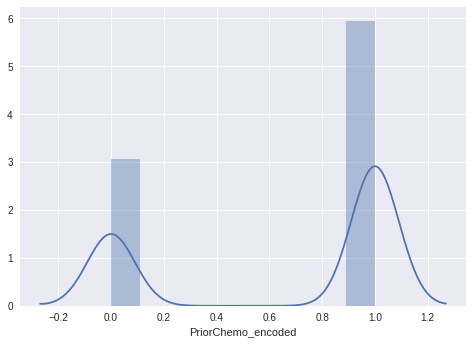

In [20]:
import seaborn as sns
x = train_bsl.PriorChemo_encoded
sns.distplot(x);

In [0]:
train_bsl['Treatment'] = np.where(train_bsl['Treatment']==True, 'Tecentriq', 'Chemo')

In [0]:
#baseline with only tecentric data
train_bsl_tctrq=train_bsl.loc[train_bsl['Treatment'] == 'Tecentriq']

In [0]:
##baseline with only Standard of Care
train_bsl_soc=train_bsl.loc[train_bsl['Treatment'] != 'Tecentriq']

In [28]:
categorical_list = []
numerical_list = []
for i in train_bsl.columns.tolist():
    if train_bsl[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 18
Number of numerical features: 6


In [0]:
train_prcssd_rna_seq = pd.read_csv('/home/jovyan/data/train_ProcessedRNAseq.csv.gz', compression='gzip',
                   error_bad_lines=False)

In [0]:
  #Left Merge the baseline and labs data
  merg_train_bsl_labs = pd.merge(train_bsl, train_labs, on='PatientID', how='left')

In [0]:
#left merge the merg_train_bsl_labs dataframe with vitals data
merg_train_bsl_labs_vitals = pd.merge(merg_train_bsl_labs, train_vitals, on='PatientID', how='left')

In [39]:
#Feature Selection for Tecentriq only data
corr_tctrq = merg_train_bsl_labs_vitals.corr()['Respond'][merg_train_bsl_labs_vitals.corr()['Respond'] < 1].abs()
corr_tctrq.sort_values(ascending=False)
corr_tctrq.head()

Age             0.004881
BaselineECOG    0.091503
PDL1IC          0.048768
PDL1TC          0.014036
TestDay         0.006734
Name: Respond, dtype: float64

In [0]:
#Define a generic function using Pandas replace function
    def coding(col, codeDict):
      colCoded = pd.Series(col, copy=True)
      for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
      return colCoded

    #Coding Brand as Y=1, N=0:
    print ('Before Coding:')
    print (pd.value_counts(train_bsl["Age"]))
    train_bsl["Age_coded"] = coding(train_bsl["Age"], {'M':0,'F':1})
    print ('\nAfter Coding:')
    print (pd.value_counts(train_bsl["age_Coded"]))

# Univariate plotting with pandas

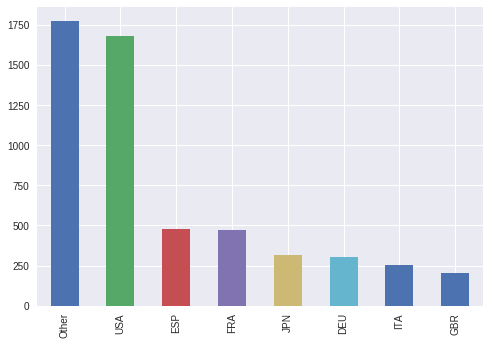

In [43]:
train_bsl['Country'].value_counts().head(10).plot.bar()

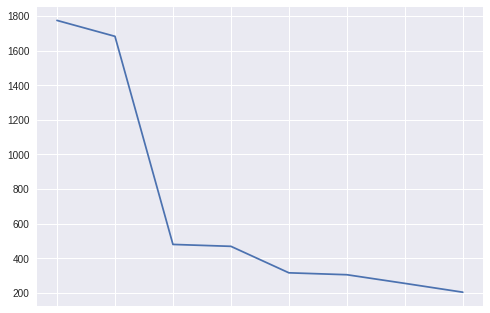

In [44]:
train_bsl['Country'].value_counts().head(10).plot.line()

In [47]:
train_bsl['Age'].value_counts().head(10).plot.area

<bound method SeriesPlotMethods.area of <pandas.plotting._core.SeriesPlotMethods object at 0x7fc252047128>>

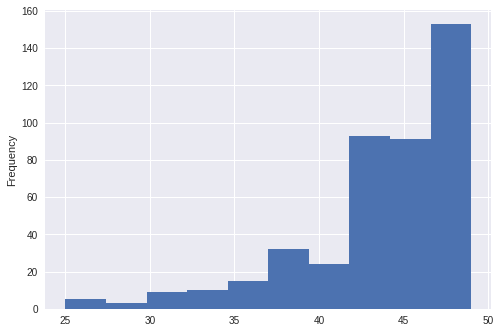

In [48]:
train_bsl[train_bsl['Age'] < 50]['Age'].plot.hist()

#Bivariating Plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


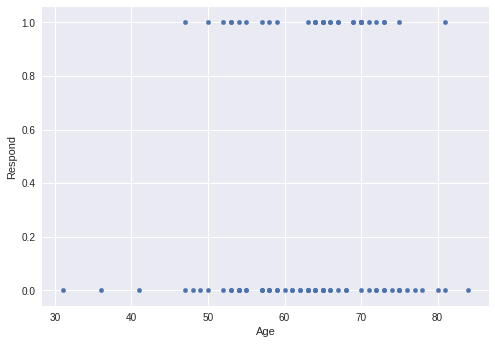

In [52]:
train_bsl[train_bsl['Age'] < 100].sample(100).plot.scatter(x='Age', y='Respond')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


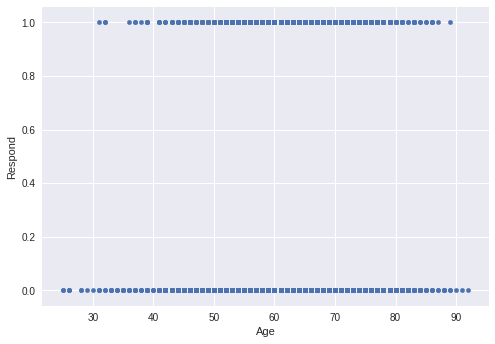

In [53]:
train_bsl[train_bsl['Age'] < 100].plot.scatter(x='Age', y='Respond')

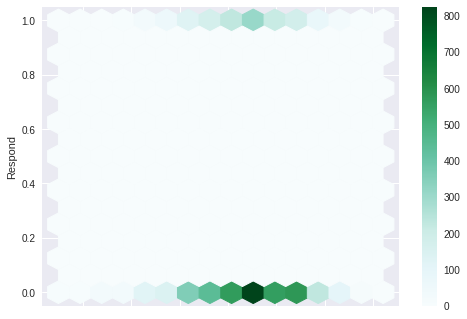

In [54]:
train_bsl[train_bsl['Age'] < 100].plot.hexbin(x='Age', y='Respond', gridsize=15)

# Seaborn

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


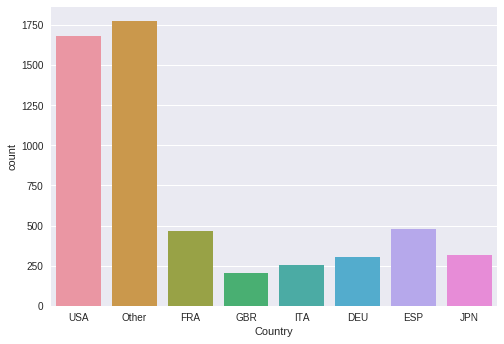

In [58]:
sns.countplot(train_bsl['Country'])

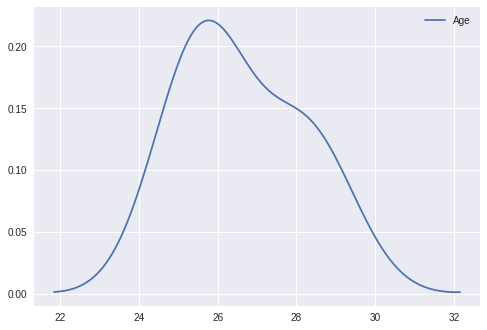

In [59]:
sns.kdeplot(train_bsl.query('Age < 30').Age)

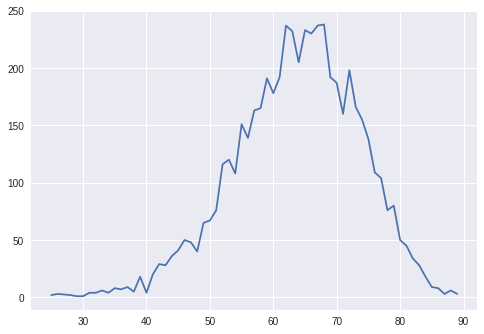

In [61]:
train_bsl[train_bsl['Age'] < 90]['Age'].value_counts().sort_index().plot.line()

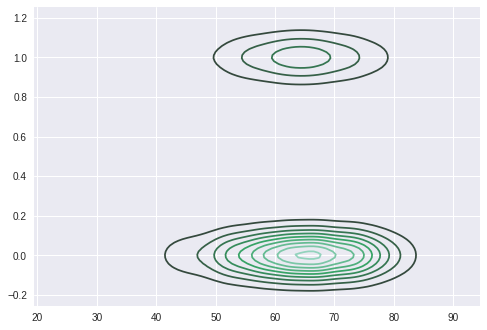

In [62]:
sns.kdeplot(train_bsl[train_bsl['Age'] < 90].loc[:, ['Age', 'Respond']].dropna().sample(5000))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


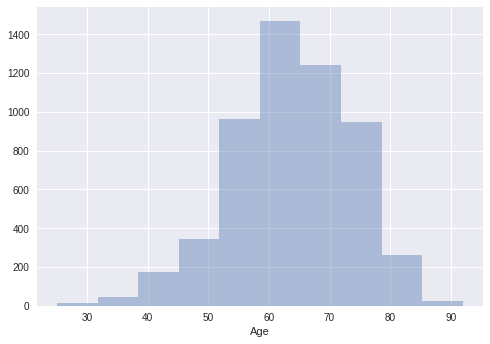

In [63]:
sns.distplot(train_bsl['Age'], bins=10, kde=False)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


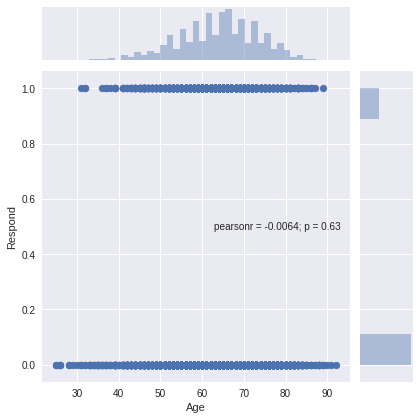

In [64]:
sns.jointplot(x='Age', y='Respond', data=train_bsl[train_bsl['Age'] < 100])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


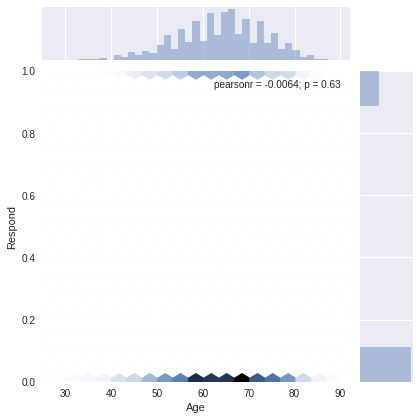

In [65]:
sns.jointplot(x='Age', y='Respond', data=train_bsl[train_bsl['Age'] < 100], kind='hex', 
              gridsize=20)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


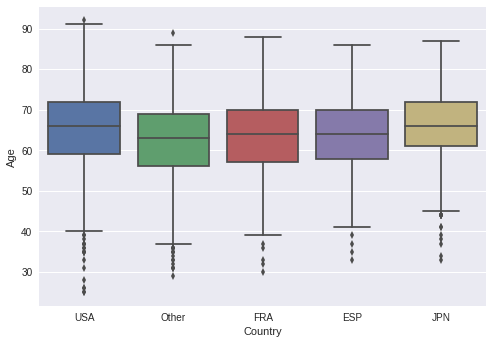

In [68]:
df = train_bsl[train_bsl.Country.isin(train_bsl.Country.value_counts().head(5).index)]

sns.boxplot(
    x='Country',
    y='Age',
    data=df
)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


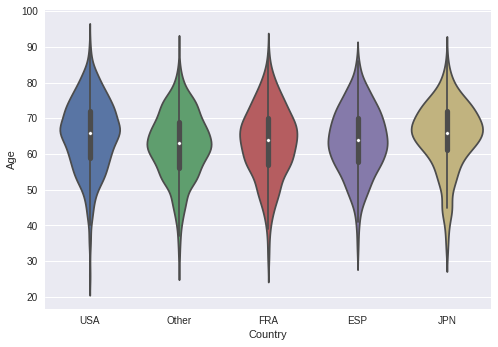

In [69]:
sns.violinplot(
    x='Country',
    y='Age',
    data=train_bsl[train_bsl.Country.isin(train_bsl.Country.value_counts()[:5].index)]
)

#Subplot

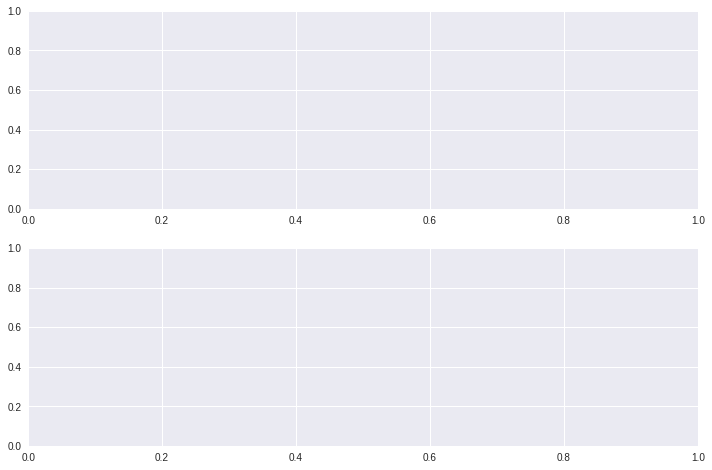

In [70]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

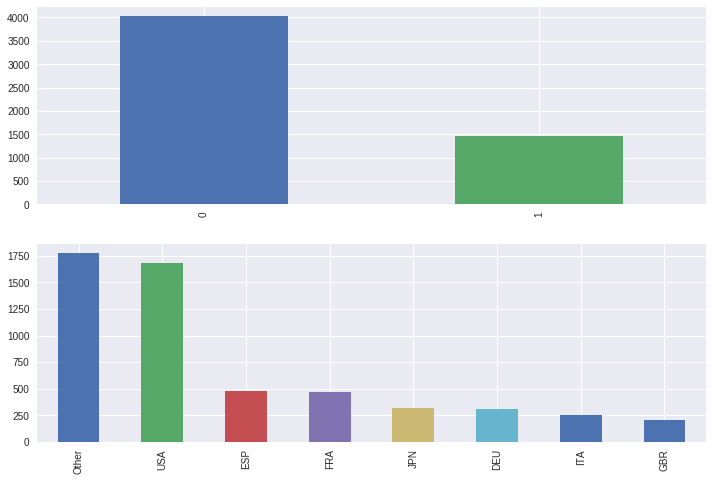

In [72]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

train_bsl['Respond'].value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

train_bsl['Country'].value_counts().head(20).plot.bar(
    ax=axarr[1]
)

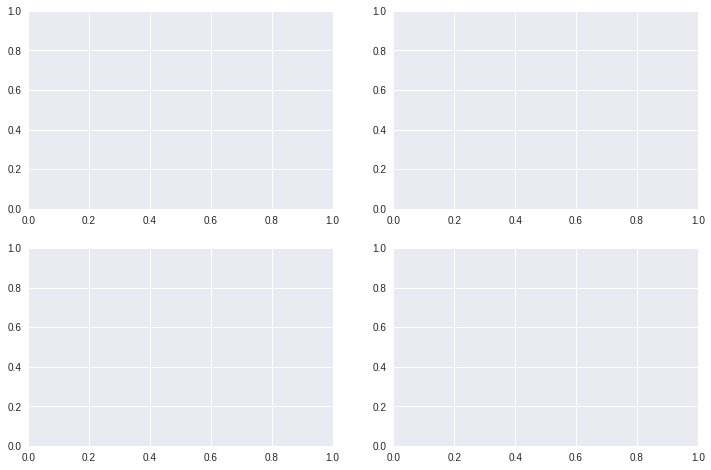

In [73]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

In [74]:
axarr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc246b484a8>,
      dtype=object)

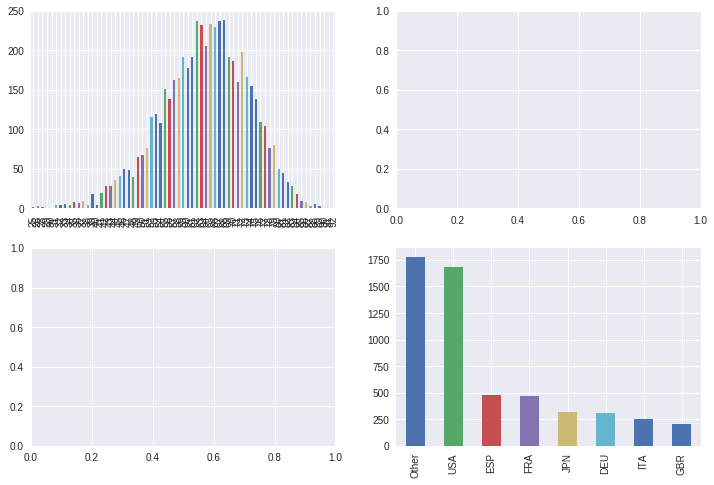

In [75]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

train_bsl['Age'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0]
)

train_bsl['Country'].value_counts().head(20).plot.bar(
    ax=axarr[1][1]
)

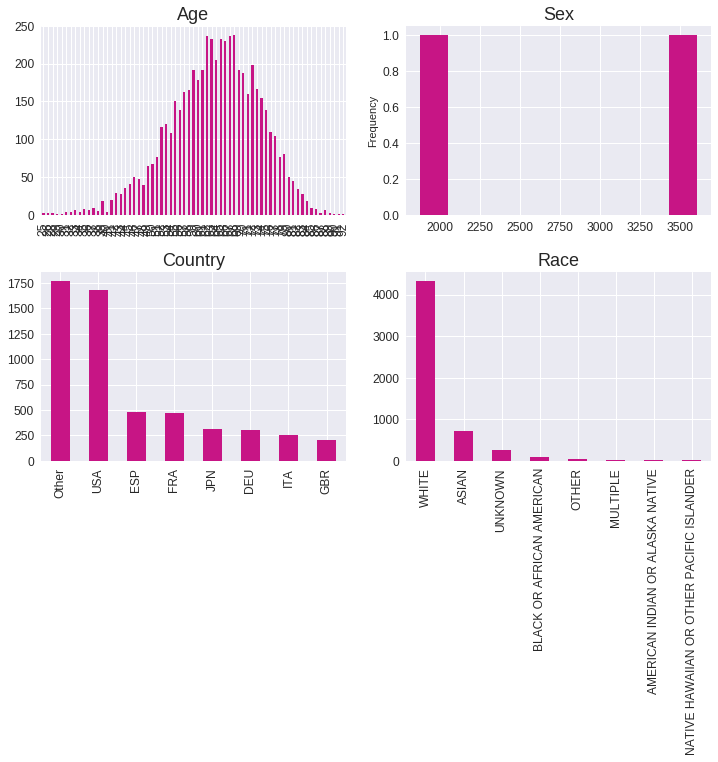

In [76]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

train_bsl['Age'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Age", fontsize=18)

train_bsl['Country'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Country", fontsize=18)

train_bsl['Race'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Race", fontsize=18)

train_bsl['Sex'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Sex", fontsize=18)

plt.subplots_adjust(hspace=.3)

import seaborn as sns
sns.despine()

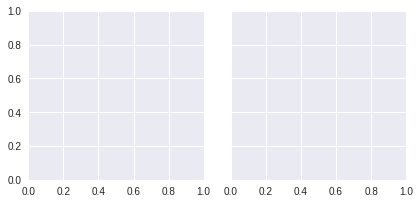

In [79]:
df = train_bsl[train_bsl['Country'].isin(['USA', 'ESP'])]
g = sns.FacetGrid(df, col="Country")